In [2]:
import pandas as pd
from src.data.hex_utils import * 
import pickle
import numpy as np

In [3]:
with open("../data/processed/geolife_hex_100.pkl", 'rb') as f: 
    hdf = pickle.load(f)
hdf

,lat,lon,datetime,trajectory,user,t_idx,timediff,x,y,dist,...,q2,r2,q3,r3,is_workday,is_in_time_0,is_in_time_1,is_in_time_2,is_in_time_3,time_label
312042,39.984702,116.318417,2008-10-23 02:53:04,0,0,1,NaT,1.995438e+07,4.441405e+06,0.000000,...,0,13,-2,6,True,True,False,False,False,4
312043,39.984683,116.318450,2008-10-23 02:53:10,0,0,1,0 days 00:00:06,1.995438e+07,4.441403e+06,3.529644,...,0,13,-2,6,True,True,False,False,False,4
312044,39.984686,116.318417,2008-10-23 02:53:15,0,0,1,0 days 00:00:05,1.995438e+07,4.441403e+06,2.845456,...,0,13,-2,6,True,True,False,False,False,4
312045,39.984688,116.318385,2008-10-23 02:53:20,0,0,1,0 days 00:00:05,1.995437e+07,4.441403e+06,2.749191,...,0,13,-2,6,True,True,False,False,False,4
312046,39.984655,116.318263,2008-10-23 02:53:25,0,0,1,0 days 00:00:05,1.995436e+07,4.441399e+06,11.073900,...,0,13,-2,6,True,True,False,False,False,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12420282,39.866483,116.415383,2007-12-08 07:09:44,12,181,17118,0 days 00:01:05,1.996346e+07,4.428769e+06,53.807437,...,6,9,0,5,False,False,True,False,False,1
12420283,39.866033,116.415683,2007-12-08 07:11:20,12,181,17118,0 days 00:01:36,1.996349e+07,4.428720e+06,56.320576,...,6,9,0,5,False,False,True,False,False,1
12420284,39.865550,116.415733,2007-12-08 07:12:42,12,181,17118,0 days 00:01:22,1.996350e+07,4.428667e+06,53.978145,...,6,9,0,5,False,False,True,False,False,1
12420285,39.864883,116.415750,2007-12-08 07:14:02,12,181,17118,0 days 00:01:20,1.996351e+07,4.428593e+06,74.230941,...,6,9,0,5,False,False,True,False,False,1


In [6]:
hdf.columns

Index(['lat', 'lon', 'datetime', 'trajectory', 'user', 't_idx', 'timediff',
       'x', 'y', 'dist', 'speed', 'q0', 'r0', 'q1', 'r1', 'q2', 'r2', 'q3',
       'r3', 'is_workday', 'is_in_time_0', 'is_in_time_1', 'is_in_time_2',
       'is_in_time_3', 'time_label'],
      dtype='object')

In [3]:
def small_to_big(xy, radius):
    xyz = np.concatenate([xy, -xy.sum(axis=-1)[..., None]], axis=-1)
    area = 3 * radius**2 + 3 * radius + 1
    shift = 3 * radius + 2

    temp_xyz = (np.roll(xyz, -1, axis=-1) + shift * xyz) // area
    xyz_big = (1 + temp_xyz - np.roll(temp_xyz, -1, axis=-1) ) // 3
    return xyz_big[:, :-1]

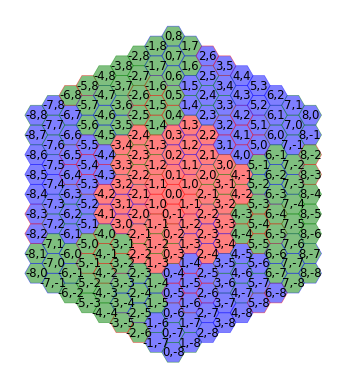

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

colors = ["r", "g", "b"]



def plot_hex_grid(highlight_coords, grid_size=8, hex_radius=1):
    """
    Plots a hexagonal grid and highlights specific cells based on axial coordinates.

    Parameters:
    - highlight_coords: A numpy array of shape (n, 2) containing the axial coordinates (q, r) to highlight.
    - grid_size: The number of hexagons from the origin to the edge of the grid.
    - hex_radius: The radius of the hexagons in the grid.
    """
    fig, ax = plt.subplots()

    # Function to convert axial coordinates (q, r) to cartesian coordinates (x, y)
    def hex_to_cartesian(q, r, radius):
        x = radius * (3 / 2 * q)
        y = radius * (np.sqrt(3) * (r + q / 2))
        return x, y

    # Create the grid
    for q in range(-grid_size, grid_size + 1):
        for r in range(-grid_size, grid_size + 1):
            if abs(q + r) <= grid_size:
                i, j = small_to_big(np.array([q, r])[None, ...], 1)[0]
                i1, j1 = small_to_big(np.array([i, j])[None, ...], 1)[0]
                x, y = hex_to_cartesian(q, r, hex_radius)
                hexagon = patches.RegularPolygon(
                    (x, y),
                    numVertices=6,
                    radius=hex_radius,
                    orientation=np.radians(30),
                    edgecolor=colors[(i - j) % 3],
                    facecolor=colors[(i1 - j1) % 3],
                    alpha=0.5,
                    linewidth=0.5,
                )
                ax.text(
                    x,
                    y,
                    f"{q},{r}",
                    horizontalalignment="center",
                    verticalalignment="center",
                    size='small'
                )
                ax.add_patch(hexagon)

    # Set equal scaling and remove axes for better visualization
    ax.set_aspect("equal")
    ax.autoscale_view()
    plt.axis("off")
    plt.show()


# Example usage:
highlight_coords = np.array([[0, 0], [1, -1], [-2, 2]])
plot_hex_grid(highlight_coords)